# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from seaborn import load_dataset

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.52e-06
Time:                        20:41:00   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

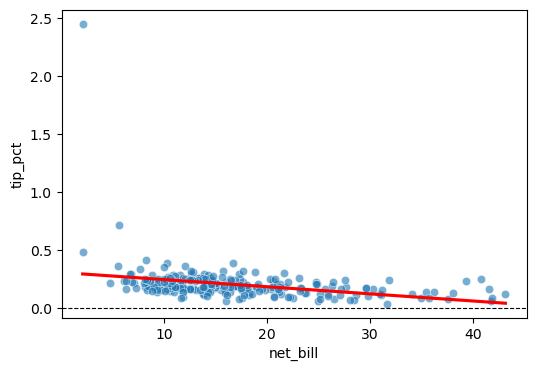

In [4]:
# Ajuste do modelo que relaciona tip_pct e net_bill
modelo = smf.ols('tip_pct ~ net_bill', data=tips)
resultado = modelo.fit()
print(resultado.summary())

# Gráfico de dispersão com reta ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.6)
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter=False, ci=None, color='red')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.62e-13
Time:                        20:45:06   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

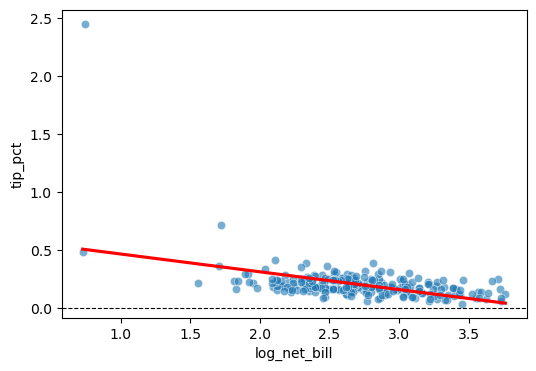

In [5]:
# filtrar valores positivos e criar logaritmo de net_bill
tips_pos = tips[tips['net_bill'] > 0].copy()
tips_pos['log_net_bill'] = np.log(tips_pos['net_bill'])

# ajuste do modelo tip_pct ~ log(net_bill)
modelo2 = smf.ols('tip_pct ~ log_net_bill', data=tips_pos).fit()
print(modelo2.summary())

# gráfico de dispersão com reta ajustada
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips_pos, alpha=0.6)
sns.regplot(x='log_net_bill', y='tip_pct', data=tips_pos, scatter=False, ci=None, color='red')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.06e-09
Time:                        20:48:11   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

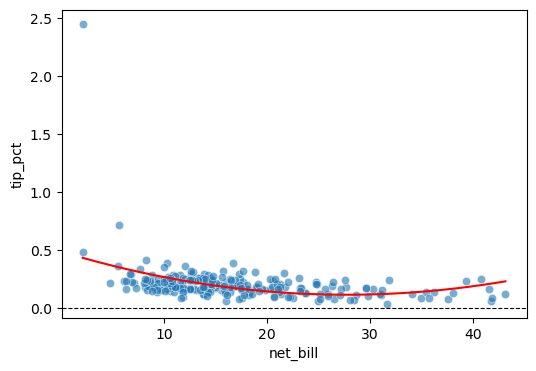

In [6]:
# Ajuste do modelo polinomial de 2º grau
modelo3 = smf.ols('tip_pct ~ net_bill + I(net_bill**2)', data=tips).fit()
print(modelo3.summary())

# Gráfico com curva ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.6)
x_pred = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 200)
pred_df = pd.DataFrame({'net_bill': x_pred})
pred_df['tip_pct_pred'] = modelo3.predict(pred_df)
plt.plot(x_pred, pred_df['tip_pct_pred'], color='red')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [7]:
# filtrar tip_pct positivos
tips_pos = tips[tips['tip_pct'] > 0].copy()

# ajustar modelo log(tip_pct) ~ net_bill
modelo4 = smf.ols('np.log(tip_pct) ~ net_bill', data=tips_pos).fit()
print(modelo4.summary())

# previsões na escala log e transformação para escala original
pred_log = modelo4.predict(tips_pos)
pred_tip_pct = np.exp(pred_log)

# calcular R^2 em tip_pct (escala original)
y = tips_pos['tip_pct'].values
ss_res = np.sum((y - pred_tip_pct) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2_tip = 1 - ss_res / ss_tot
print(f"R^2 em tip_pct: {r2_tip:.4f}")

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           8.27e-16
Time:                        20:53:59   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [8]:
# filtrar valores positivos
tips_pos = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)].copy()
tips_pos['log_tip_pct'] = np.log(tips_pos['tip_pct'])
tips_pos['log_net_bill'] = np.log(tips_pos['net_bill'])

# ajuste do modelo log(tip_pct) ~ log(net_bill)
modelo5 = smf.ols('log_tip_pct ~ log_net_bill', data=tips_pos).fit()
print(modelo5.summary())

# previsões na escala log e transformação para escala original
pred_log = modelo5.predict(tips_pos)
pred_tip_pct = np.exp(pred_log)

# calcular R^2 em tip_pct (escala original)
y = tips_pos['tip_pct'].values
ss_res = np.sum((y - pred_tip_pct) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2_tip = 1 - ss_res / ss_tot
print(f"R^2 em tip_pct: {r2_tip:.4f}")

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           5.20e-20
Time:                        20:58:19   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

###  6. qual modelo resultou no melhor ajuste?

    O melhor ajuste foi o modelo log(tip_pct) ~ log(net_bill), com R² em tip_pct = 0.2277, o maior entre os modelos testados.

In [9]:
tips_pos = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)].copy()
tips_pos['log_tip_pct'] = np.log(tips_pos['tip_pct'])
tips_pos['log_net_bill'] = np.log(tips_pos['net_bill'])

modelo5 = smf.ols('log_tip_pct ~ log_net_bill', data=tips_pos).fit()
print(modelo5.summary())

pred_log = modelo5.predict(tips_pos)
pred_tip_pct = np.exp(pred_log)

y = tips_pos['tip_pct'].values
ss_res = np.sum((y - pred_tip_pct) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2_tip = 1 - ss_res / ss_tot
print(f"R^2 em tip_pct: {r2_tip:.4f}")

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           5.20e-20
Time:                        21:02:55   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

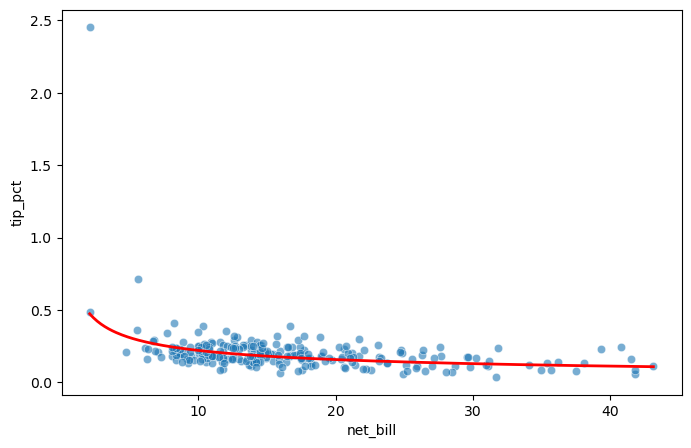

In [10]:

# carregar dados e preparar variáveis
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips_pos = tips[(tips['tip_pct'] > 0) & (tips['net_bill'] > 0)].copy()
tips_pos['log_tip_pct'] = np.log(tips_pos['tip_pct'])
tips_pos['log_net_bill'] = np.log(tips_pos['net_bill'])

# ajustar modelo log-log (caso ainda não esteja ajustado)
modelo5 = smf.ols('log_tip_pct ~ log_net_bill', data=tips_pos).fit()

# gerar previsões na grade de net_bill e transformar de volta para tip_pct
x_pred = np.linspace(tips_pos['net_bill'].min(), tips_pos['net_bill'].max(), 300)
pred_df = pd.DataFrame({'net_bill': x_pred})
pred_df['log_net_bill'] = np.log(pred_df['net_bill'])
pred_df['log_tip_pred'] = modelo5.predict(pred_df)
pred_df['tip_pred'] = np.exp(pred_df['log_tip_pred'])

# plot: observados (escala original) e curva prevista (transformada de volta)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips_pos, alpha=0.6)
plt.plot(pred_df['net_bill'], pred_df['tip_pred'], color='red', linewidth=2)
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.show()